# Práctico Aprendizaje No Supervisado 2020 DiploDatos

Utilizar la base de jugadores “players_20.csv” disponible en la página de Kaggle https://www.kaggle.com/stefanoleone992/fifa-20-complete-player-dataset?select=players_20.csv . Considerar que la base 2020 no tiene el mismo formato que la base vista en clase, a los nombres de las variables se les agregó una keyword para identificar a qué tipo de habilidad corresponde.

Con la nueva base, realizar un análisis análogo al que realizamos en el cursado de la materia con los datos FIFA2019 (Basarse en las notebooks ntb_clustering_1_fifa2019, ntb_clustering_2_fifa2019 y ntb3_embeddings_fifa2019). Realice comentarios en cada parte (verbose=True ;))

1- Análisis exploratorio (sintético, no muy extenso) .

2- Evaluación visual e intuitiva de a dos variables por vez.

3- Uso de técnicas de clustering: k-Medias, Mean Shift, agregar alguna jerárquica vista en el teórico (sugerencia: usar 'cityblock' como distancia en el jerárquico).

4- Análisis de los clusters encontrados.

5- Embeddings y técnicas de clustering.

6- Evaluación.

7- Pregunta: ¿Se realizó alguna normalización de la base? ¿Por qué ?    

## Integrantes del Grupo
- Borgnino Leandro
- Quintana Clara
- Perez Jorge

## 1- Análisis exploratorio

Empezamos cargando algunas herramientas para cargar los datos y manipularlos.

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

Para visualización usamos plotly, pero podemos usar seaborn tambien, o matplotlib. 

In [2]:
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-9l2t6441 because the default path (/home/lborgnino/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


Para la generación de clusters.

In [3]:
from sklearn import cluster, decomposition, preprocessing
from sklearn.cluster import KMeans, MeanShift, AgglomerativeClustering

Cargamos la base de jugadores “players_20.csv” disponible en la página de Kaggle https://www.kaggle.com/stefanoleone992/fifa-20-complete-player-dataset?select=players_20.csv .

In [4]:
df=pd.read_csv("players_20.csv")

In [5]:
df.head(5)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,...,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,...,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,...,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,...,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,...,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,2024.0,LF,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Selfish

In [6]:
print(f'Cantidad de filas y columnas: {df.shape}')

Cantidad de filas y columnas: (18278, 104)


Observamos las variables numéricas:

In [7]:
df.describe().columns

Index(['sofifa_id', 'age', 'height_cm', 'weight_kg', 'overall', 'potential',
       'value_eur', 'wage_eur', 'international_reputation', 'weak_foot',
       'skill_moves', 'release_clause_eur', 'team_jersey_number',
       'contract_valid_until', 'nation_jersey_number', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positionin

In [8]:
df.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,18278.000000,1.698000e+04,18038.000000,18038.000000,1126.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,2.368038,4.740717e+06,20.103892,2021.114591,12.114565,67.700899,52.298301,57.233777,62.531585,51.553503,64.876678,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754,49.718405,45.590218,52.221468,58.748003,42.809388,55.596509,47.325692,42.708885,52.768848,58.461976,64.299923,64.415746,63.504924,61.752544,63.856439,58.181694,64.928165,62.889485,65.234763,46.812945,55.742149,46.380239,50.072163,53.609749,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,0.765038,1.103002e+07,16.603639,1.289888,6.735922,11.297656,14.029418,10.407844,10.284950,16.419528,9.760162,7.736278,7.244023,7.510709,8.154062,10.634038,8.447876,18.325403,19.594609,17.428429,14.679653,17.701815,18.929118,18.422991,17.433612,15.246454,16.741878,15.042232,14.847763,14.808380,9.135613,14.201559,13.326083,11.934059,16.017954,12.534811,19.322343,17.318157,20.775812,19.594022,13.955626,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.300000e+04,1.000000,2019.000000,1.000000,24.000000,15.000000,24.000000,23.000000,15.000000,27.000000,44.000000,42.000000,35.000000,45.000000,12.000000,41.000000,5.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,8.000000,5.000000,12.000000,11.000000,11.000000,21.000000,12.000000,14.000000,19.000000,12.000000,20.000000,4.000000,9.000000,3.000000,2.000000,9.000000,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,5.630000e+05,9.000000,2020.000000,6.000000,61.000000,42.000000,50.000000,57.000000,36.000000,59.000000,60.000000,58.000000,57.000000,60.750000,29.000000,58.000000,38.000000,30.000000,44.000000,54.000000,30.000000,50.000000,34.000000,31.000000,43.000000,54.000000,56.000000,57.

Las variables 'gk_diving', 'gk_handling', 'gk_kicking',	'gk_reflexes' y 'gk_positioning' son reemplazadas por 
'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_reflexes' y 'goalkeeping_positioning'. 

La variable 'gk_speed' no tuvo reemplazo.

La variable 'overall' se calcula usando otras variables de desempeño del jugador (skills_ratings).

La variable 'overall' es discreta, así como las otras de desempeño según habilidad ('skill_long_passing', 'movement_reactions', etc.), tomando valores enteros entre 0 y 100

Miramos ahora los mejores jugadores por posicion, usando las variables 'overall' y 'team_position'.

<AxesSubplot:>

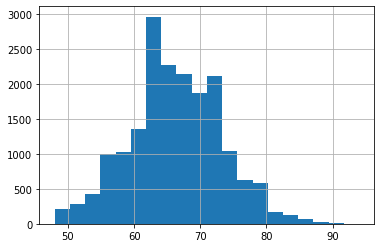

In [9]:
df['overall'].hist(bins = 20)

In [10]:
best_players_per_position=df.iloc[df.groupby(df['team_position'])['overall'].idxmax()][['team_position','short_name','overall']]
best_players_per_position

,team_position,short_name,overall
2,CAM,Neymar Jr,92
126,CB,S. de Vrij,84
21,CDM,Sergio Busquets,89
46,CF,K. Benzema,87
123,CM,Luis Alberto,84
3,GK,J. Oblak,91
306,LAM,Taison,82
51,LB,Jordi Alba,87
7,LCB,V. van Dijk,90
33,LCM,David Silva,88


Preparamos la base para Clustering:

* Retiramos jugadores con bajo desempeño global ("overall")
* Consideramos variables de desempeño por habilidad (skills_ratings)
* Normalizamos los datos

In [11]:
df_n=df[(df['overall'] > 75)] # mejores jugadores

print(f'{len(df_n)} mejores jugadores con overall mayor a 75')


skills_ratings = ['attacking_crossing', 'attacking_finishing',
                  'attacking_heading_accuracy', 'attacking_short_passing',
                  'attacking_volleys', 'skill_dribbling', 'skill_curve',
                  'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
                  'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
                  'movement_reactions', 'movement_balance', 'power_shot_power',
                  'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
                  'mentality_aggression', 'mentality_interceptions',
                  'mentality_positioning', 'mentality_vision', 'mentality_penalties',
                  'mentality_composure', 'defending_marking', 'defending_standing_tackle',
                  'defending_sliding_tackle', 'goalkeeping_diving',
                  'goalkeeping_handling', 'goalkeeping_kicking',
                  'goalkeeping_positioning', 'goalkeeping_reflexes']

print(f'{len(skills_ratings)} variables numéricas de desempeño según habilidad')

df_skills=df_n[skills_ratings]


1615 mejores jugadores con overall mayor a 75
34 variables numéricas de desempeño según habilidad


Controlamos que no haya valores nulos.

In [12]:
df_skills.isnull().sum()

attacking_crossing            0
attacking_finishing           0
attacking_heading_accuracy    0
attacking_short_passing       0
attacking_volleys             0
skill_dribbling               0
skill_curve                   0
skill_fk_accuracy             0
skill_long_passing            0
skill_ball_control            0
movement_acceleration         0
movement_sprint_speed         0
movement_agility              0
movement_reactions            0
movement_balance              0
power_shot_power              0
power_jumping                 0
power_stamina                 0
power_strength                0
power_long_shots              0
mentality_aggression          0
mentality_interceptions       0
mentality_positioning         0
mentality_vision              0
mentality_penalties           0
mentality_composure           0
defending_marking             0
defending_standing_tackle     0
defending_sliding_tackle      0
goalkeeping_diving            0
goalkeeping_handling          0
goalkeep

In [13]:
df_skills=df_n[skills_ratings] 

In [14]:
df_skills.head(5)

,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8


Normalizamos los datos para evitar que unas variables dominen sobre otras los valores.

Encontramos que distinguió mejor las categorías utilizando MinMaxScaler() que StandardScaler()

In [15]:
std_scale = preprocessing.MinMaxScaler().fit_transform(df_skills.values)
df_skills = pd.DataFrame(std_scale)

## 2- Evaluación visual e intuitiva de a dos variables por vez.

In [16]:
data=[]
bool_crack=df_n["overall"] > 90 #diferenciamos a los mejores jugadores

#Elejimos dos variables, para esto elejimos dos números entre 0 y  de n_skills-1
skill_1 = 28
skill_2 = 5



graf1 = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                        mode='markers',
                        text=df_n.loc[:,'team_position'],
                        marker=dict(
                            size=5)
                        )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=20,color='black'),
                      opacity=0.9,mode='text')

data=[graf1,crack]

layout = go.Layout(title="Visualización de la base de a dos variables numéricas",titlefont=dict(size=20),
                xaxis=dict(title=skills_ratings[skill_1]),
                yaxis=dict(title=skills_ratings[skill_2]),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

#### Conclusiones:

* Finishing(1) vs Interceptions(21): separa arqueros abajo a la izquierda y del resto. Mediocampistas arriba a la derecha, defensores arriba la izquierda y delanteros abajo a la derecha.

* Short Passing(3) vs LongPassing (8): Correlacion positiva entre las variables. Mediocampistas arriba a la derecha, arqueros abajo a la izquierda.

* FKAccuracy(7) vs Penalties(24): Una correlacion positiva no tan fuerte, arqueros abajo a la izquierda, mediocampistas y delanteros arriba a la derecha.

* FKAccuracy(7) vs SprintSpeed(11): No hay correlacion entre las variables.

* SlidingTackle(28) vs Dribbling(5): Se ven 3 grupos diferentes: 1. Arqueros abajo a la izquierda 2. Ofensivos: Arriba a la izquierda 3. Defensivos: A la derecha

# 3- Uso de técnicas de clustering: k-Medias, Mean Shift, agregar alguna jerárquica vista en el teórico (sugerencia: usar 'cityblock' como distancia en el jerárquico).

## Clustering con K-Means

Es necesario definirle la cantidad de grupos/clusters (n_clusters), es un hiperparámetro del algoritmo. 


**Elección de la cantidad de grupos/clusters**

Una forma de seleccionar la cantidad más adecuada de clusters es probar varias cantidades y usar el criterio del codo: "elbow method", utilizando una medida de ajuste que puede ser Inertia.

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

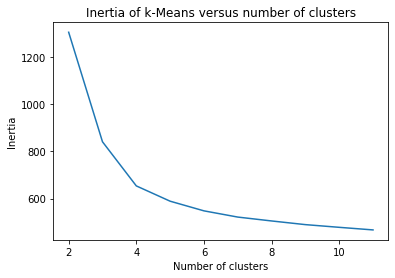

In [17]:
#Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a 11 clusters
scores = [KMeans(n_clusters=i+2).fit(df_skills).inertia_ for i in range(10)]

from matplotlib import pyplot as plt
plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

La mejor opción es 4 clusters.

In [18]:
# Número de clusters buscado
n_clust = 4

km = KMeans(n_clusters=n_clust, random_state=42)
km.fit(df_skills)

# Recuperacion de etiquetas
clusters = km.labels_
print('Suma de los cuadrados de las distancias al cluster / Inertia: ', km.inertia_)

Suma de los cuadrados de las distancias al cluster / Inertia:  653.5435351728207


**Graficamos el resultado kmedias con la cantidad de clases elegida: Visualizamos de a dos variables por vez**

In [19]:
data=[]
bool_crack=df_n["overall"] > 90
bool_no_crack=df_n["overall"]<91


#Eligo dos números entre 0 y  de n_skills-1
skill_1 = 28 
skill_2 = 5 


kmean_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'team_position'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Ckacks!!',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=20,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=skills_ratings[skill_1]),
                yaxis=dict(title=skills_ratings[skill_2]),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

Cantidad de observaciones por Cluster

In [20]:
df_clusters=df_n.copy()
df_clusters['kmeans'] = km.labels_ #clusters
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters, nosotros lo forzamos')

df_clusters.groupby('kmeans').size()

Kmeans encontró:  4 clusters, nosotros lo forzamos


kmeans
0    588
1    165
2    309
3    553
dtype: int64

Observamos los mejores jugadores y su posición de cada cluster

In [21]:
best_players_per_cluster=df_clusters.iloc[df_clusters.groupby(df_clusters['kmeans'])['overall'].idxmax()][['kmeans','short_name','team_position','player_positions','overall']]
best_players_per_cluster

,kmeans,short_name,team_position,player_positions,overall
5,0,K. De Bruyne,RCM,"CAM, CM",91
3,1,J. Oblak,GK,GK,91
11,2,K. Koulibaly,LCB,CB,89
0,3,L. Messi,RW,"RW, CF, ST",94


Análisis descriptivo separando por Cluster

* Cluster 0: Mediocampo
* Cluster 1: Arqueros
* Cluster 2: Defensa
* Cluster 3: Delanteros

Graficamos el Silohuette para observar la densidad y separación de los cluster generados.

Para n_clusters = 4 El silhouette_score promedio es : 0.3312830675004366


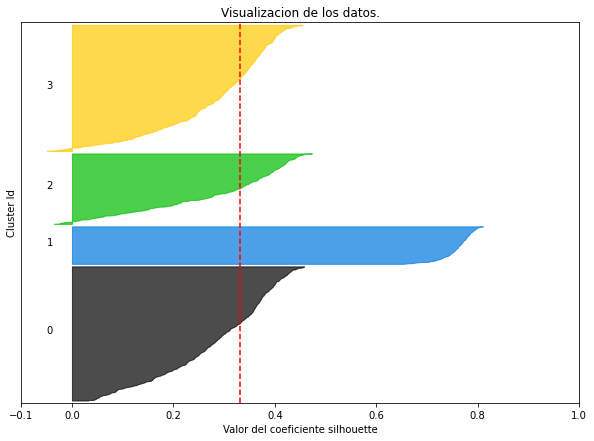

In [22]:
for i in range(1):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(10, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_skills) + (n_clust + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = km
    cluster_labels = clusters

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_skills, cluster_labels)
    print("Para n_clusters =", n_clust,
          "El silhouette_score promedio es :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_skills, cluster_labels)

    y_lower = 10
    for i in range(n_clust):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clust)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Visualizacion de los datos.")
    ax1.set_xlabel("Valor del coeficiente silhouette")
    ax1.set_ylabel("Cluster Id")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

Observamos lo siguiente:

* el cluster 1 (arqueros) tiene todos los valores altos por lo que consideramos es cluster mejor definido.
* los cluster 0 (delanteros) y 3 (defensa) tienen aproximadamente la misma cantidad de puntos y con siluetas similares.
* los cluster 0, 2 y 3 tienen valores altos y bajos. 
* los cluster 2 (mediocampo) y 3 (defensa) tienen valores negativos.


## Clustering Mean Shift 

- NO es necesario definirle la cantidad de grupos/clusters
- NO es escalable, computacionalmente es muy pesado. Cada dato tienen un proceso iterativo en donde en cada iteración considera los vecinos a menos de un radio de distancia.
- Hipeparámetros: radio (de cobertura para cálculo de media)

In [23]:
# estimacion de bandwidth para mean shift
bandwidth = cluster.estimate_bandwidth(df_skills, random_state=42, n_jobs=-1)
print(f'Se estimo un valor de bandwidth igual a {bandwidth}')

Se estimo un valor de bandwidth igual a 1.240189350000871


Si utilizamos ese valor de bandwidth, encontrará solamente 2 cluster, los arqueros y el resto de jugadores. Utilizamos el valor de bandwidth indicado por el cálculo de estimación de bandwith anterior.

In [24]:
ms = MeanShift(bandwidth=1.24, n_jobs=-1)

ms.fit(df_skills)

clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Numero estimado de clusters para Mean Shift : %d" % n_clusters_)


Numero estimado de clusters para Mean Shift : 2


In [25]:
data=[]
bool_crack=df_n["overall"] > 90
bool_no_crack=df_n["overall"] < 91


#Eligo dos números entre 0 y  de n_skills-1
skill_1 = 28
skill_2 = 5


MeanShift_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'team_position'],
                           marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=20,color='black'),
                      opacity=0.9,mode='text')

data=[MeanShift_clusters,crack]

layout = go.Layout(title="Mean Shift",titlefont=dict(size=20),
                xaxis=dict(title=skills_ratings[skill_1]),
                yaxis=dict(title=skills_ratings[skill_2]),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

In [26]:
df_clusters['MeanShift'] = ms.labels_ #clusters2
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters, nosotros lo forzamos')
print('Mean shift encontró ', max(ms.labels_)+1, 'clusters, según los hiperparámetros elegidos')

df_clusters.groupby('MeanShift').size()

Kmeans encontró:  4 clusters, nosotros lo forzamos
Mean shift encontró  2 clusters, según los hiperparámetros elegidos


MeanShift
0    1450
1     165
dtype: int64

Observamos los mejores jugadores y su posición de cada cluster

In [27]:
best_players_per_cluster=df_clusters.iloc[df_clusters.groupby(df_clusters['MeanShift'])['overall'].idxmax()][['MeanShift','short_name','team_position', 'player_positions','overall']]
best_players_per_cluster

,MeanShift,short_name,team_position,player_positions,overall
0,0,L. Messi,RW,"RW, CF, ST",94
3,1,J. Oblak,GK,GK,91


Análisis descriptivo separando por Cluster

- Cluster 0: Defensores, Mediocampo y Delanteros
- Cluster 1: Arqueros

Graficamos el Silohuette para observar la densidad y separación de los cluster generados.

Para n_clusters = 2 El silhouette_score promedio es : 0.6232564607246991


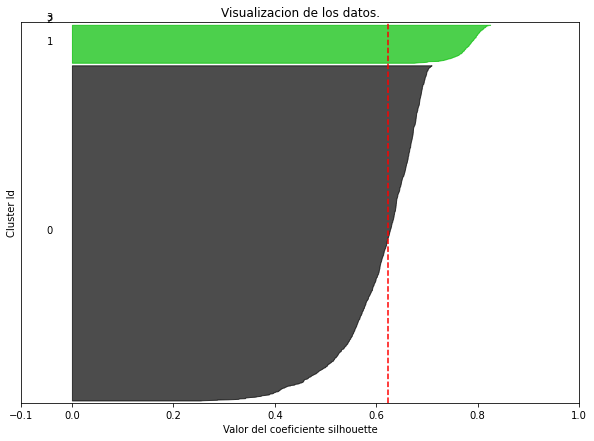

In [28]:
for i in range(1):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(10, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_skills) + (n_clusters_ + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = ms
    cluster_labels = clusters2

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_skills, cluster_labels)
    print("Para n_clusters =", n_clusters_,
          "El silhouette_score promedio es :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_skills, cluster_labels)

    y_lower = 10
    for i in range(n_clust):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters_)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Visualizacion de los datos.")
    ax1.set_xlabel("Valor del coeficiente silhouette")
    ax1.set_ylabel("Cluster Id")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

Observamos lo siguiente:

* el promedio es más alto que el del método K-Means.
* ninguno de los 2 clusters tiene valor negativo, por lo que suponemos están bien clasificados.
* el cluster 1 (arqueros) tiene la misma silueta que el obtenido en el método K-Means.
* está muy desbalanciado la cantidad de muestras en los 2 clusters.
* el cluster 0 incluye todas las posiciones de los jugadores distintas al arquero. El método no los distingue.

## Clustering Jerárquico



In [29]:
ward = cluster.AgglomerativeClustering(n_clusters=4, linkage='ward')

ward.fit(df_skills)

clusters3 = ward.labels_

labels_unique = np.unique(clusters3)
n_clusters_ = len(labels_unique)

print('Cantidad de hojas: ', ward.n_leaves_)


Cantidad de hojas:  1615


In [30]:
data=[]
bool_crack=df_n["overall"] > 90
bool_no_crack=df_n["overall"] < 91


#Eligo dos números entre 0 y  de n_skills-1
skill_1 = 28
skill_2 = 5


Ward_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'team_position'],
                           marker=dict(
                                size=5,
                                color = clusters3.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=20,color='black'),
                      opacity=0.9,mode='text')

data=[Ward_clusters,crack]

layout = go.Layout(title="Cluster Jerárquico",titlefont=dict(size=20),
                xaxis=dict(title=skills_ratings[skill_1]),
                yaxis=dict(title=skills_ratings[skill_2]),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

In [31]:
df_clusters['Ward'] = ward.labels_ 
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters, nosotros lo forzamos')
print('Mean shift encontró ', max(ms.labels_)+1, 'clusters, según los hiperparámetros elegidos')
print('Ward encontró: ', max(ward.labels_)+1, 'clusters, nosotros lo forzamos')

df_clusters.groupby('Ward').size()

Kmeans encontró:  4 clusters, nosotros lo forzamos
Mean shift encontró  2 clusters, según los hiperparámetros elegidos
Ward encontró:  4 clusters, nosotros lo forzamos


Ward
0    620
1    253
2    577
3    165
dtype: int64

Observamos los mejores jugadores y su posición de cada cluster

In [32]:
best_players_per_cluster=df_clusters.iloc[df_clusters.groupby(df_clusters['Ward'])['overall'].idxmax()][['Ward','short_name','team_position', 'player_positions','overall']]
best_players_per_cluster

,Ward,short_name,team_position,player_positions,overall
0,0,L. Messi,RW,"RW, CF, ST",94
7,1,V. van Dijk,LCB,CB,90
15,2,N. Kanté,RCM,"CDM, CM",89
3,3,J. Oblak,GK,GK,91


Análisis descriptivo separando por Cluster

* Cluster 0: Delanteros
* Cluster 1: Defensa
* Cluster 2: Mediocampo
* Cluster 3: Arqueros

Graficamos el Silohuette para observar la densidad y separación de los cluster generados.

Para n_clusters = 4 El silhouette_score promedio es : 0.314142996120204


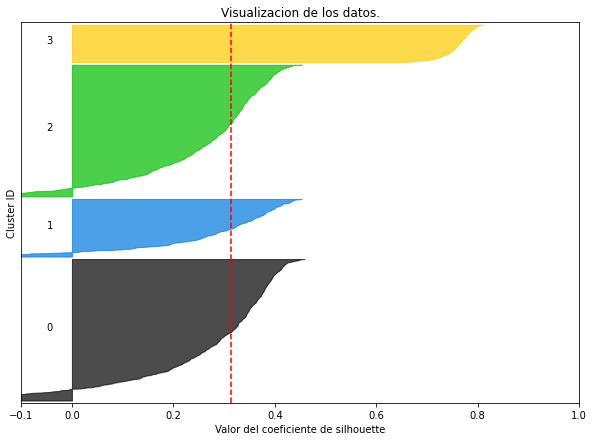

In [33]:
for i in range(1):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(10, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_skills) + (n_clust + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = ms
    cluster_labels = clusters3

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_skills, cluster_labels)
    print("Para n_clusters =", n_clust,
          "El silhouette_score promedio es :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_skills, cluster_labels)

    y_lower = 10
    for i in range(n_clust):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clust)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Visualizacion de los datos.")
    ax1.set_xlabel("Valor del coeficiente de silhouette")
    ax1.set_ylabel("Cluster ID")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

Observamos lo siguiente:

* al igual que los otros métodos, los arqueros están bien agrupados.
* las agrupaciones son muy parecidas al del método K-Means.
* menos el cluster 3 (arqueros), tienen más valores negativos que el método K-Means.

# 4- Análisis de los clusters encontrados.

Tanto en K-Means como en Jerárquico, nosotros le indicamos la cantidad de cluster a calcular.

En K-Means la cantidad de cluster la podemos determinar utilizando el método del codo.

MeanShift no logra distinguir los 4 grupos generales. El hiperparámetro bandwidth lo determinamos utilizando el método estimate_bandwidth(), pero encuentra solamente 2 cluster.


# 5- Embeddings y técnicas de clustering.

### 5.1 Centramos en 0 y normalizamos

from sklearn import preprocessing
std_scale=preprocessing.StandardScaler().fit(df_skills)
X_scaled=std_scale.transform(df_skills) # numpyarray normalizado por columna

### 5.2 Descomposición en componentes principales

In [34]:
from sklearn import decomposition
pca=decomposition.PCA(n_components=2) #elegimos 2, 3 o 4 pero pueden ser más, 

pca.fit(df_skills) #input data is centered but not scaled for each feature before applying the SVD

# proporción de varianza
print('proporción de varianza por componente: ', pca.explained_variance_ratio_)
# proporción de varianza acumulada
print ('proporción de varianza por componente acumulada: ', pca.explained_variance_ratio_.cumsum())

X_projected=pca.transform(df_skills) #numpy array
print ('tamaño de los datos: ', X_projected.shape)


proporción de varianza por componente:  [0.55875436 0.22234384]
proporción de varianza por componente acumulada:  [0.55875436 0.78109821]
tamaño de los datos:  (1615, 2)


In [35]:
pcs=pca.components_  #"composición" de las primeras componentes, 
#Graph 1
data=[]

for i, (x,y) in enumerate(zip(pcs[0,:],pcs[1,:])):
    graph=go.Scatter(x=[0,x],y=[0,y],text=df_skills.columns[i],
                     mode='lines+markers+text',textposition='top left',textfont=dict(family='sans serif',size=15))
    data.append(graph)

layout = go.Layout(title="ACP - Fifa Skills",titlefont=dict(size=20),
            xaxis=dict(title='Componente 1'),
            yaxis=dict(title='Componente 2'),
            autosize=False, width=1050,height=750,
            showlegend=False)

fig = go.Figure(data=data, layout=layout)

iplot(fig)


In [36]:
#Graph 2
#Choose your player
recherche_joueur=df_n["short_name"]=='L. Messi'

bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86
palette=['navy','red','#A2D5F2','orange','green','pink']  
data=[]

acp_crack =go.Scatter(x=X_projected[bool_crack,0], y=X_projected[bool_crack,1],name='Crack',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=15,color='black'),
                      opacity=0.9,marker=dict(color=palette[2],size=7),mode='markers+text')

acp_no_crack =go.Scatter(x=X_projected[bool_no_crack,0], y=X_projected[bool_no_crack,1],name='Average player',
                         text=df_n.loc[bool_no_crack,'short_name'],
                         opacity=0.6,marker=dict(color=palette[1],size=3),mode='markers')


joueur_recherche =go.Scatter(x=X_projected[recherche_joueur,0], y=X_projected[recherche_joueur,1],name='Searched player',
                           text=df_n.loc[recherche_joueur,'short_name'],
                            textfont=dict(family='sans serif',size=20,color='black'),
                           opacity=1,marker=dict(color=palette[4],size=40),mode='markers+text')

data=[acp_no_crack,acp_crack,joueur_recherche]

layout = go.Layout(title="ACP - Fifa Players",titlefont=dict(size=20),
                xaxis=dict(title='Componente 1'),
                yaxis=dict(title='componente 2'),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

iplot(fig)


### 5.3 K means con descomposición de componentes principales

In [37]:
# Número de clusters buscado
n_clust = 4

km = KMeans(n_clusters=n_clust)
km.fit(X_projected)

# Recuperacion de etiquetas
clusters = km.labels_
print('Suma de los cuadrados de las distancias al cluster / Inertia: ', km.inertia_)

Suma de los cuadrados de las distancias al cluster / Inertia:  125.11014534852988


In [38]:
data=[]
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86

print(X_projected)
#Eligo dos números entre 0 y  de n_skills-1
skill_1=X_projected
skill_2=X_projected


kmean_clusters = go.Scatter(x=X_projected[:,0], y=X_projected[:,1],
                           mode='markers',
                           text=df_n.loc[:,'short_name'],
                           #text=df_n.loc[:,'team_position'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=X_projected[bool_crack,0], y=X_projected[bool_crack,1],name='Ckacks!!',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title='Componente 1'),
                yaxis=dict(title='componente 2'),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

[[-1.00982298 -1.11508123]
 [-0.85210567 -1.01935133]
 [-0.85003216 -1.19515807]
 ...
 [-0.42726407 -0.84022935]
 [ 0.41655079  1.00259288]
 [-0.39499054  0.25414321]]


Para n_clusters = 4 El silhouette_score promedio es : 0.5992361502840422


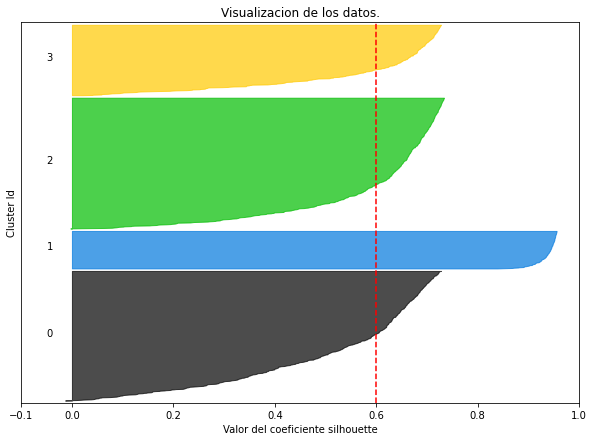

In [39]:
for i in range(1):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(10, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_skills) + (n_clust + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = km
    cluster_labels = clusters

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_projected, cluster_labels)
    print("Para n_clusters =", n_clust,
          "El silhouette_score promedio es :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_projected, cluster_labels)

    y_lower = 10
    for i in range(n_clust):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clust)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Visualizacion de los datos.")
    ax1.set_xlabel("Valor del coeficiente silhouette")
    ax1.set_ylabel("Cluster Id")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

### 5.3 MeanShift con descomposición de componentes principales

In [40]:
# estimacion de bandwidth para mean shift
bandwidth = cluster.estimate_bandwidth(X_projected, random_state=42, n_jobs=-1)
print(f'Se estimo un valor de bandwidth igual a {bandwidth}')

Se estimo un valor de bandwidth igual a 0.7964659767044118


In [41]:
ms = MeanShift(bandwidth=3.57, n_jobs=-1)

ms.fit(X_projected)

clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Numero estimado de clusters para Mean Shift : %d" % n_clusters_)

Numero estimado de clusters para Mean Shift : 1


In [42]:
data=[]
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86

print(X_projected)
#Eligo dos números entre 0 y  de n_skills-1
skill_1=X_projected
skill_2=X_projected


kmean_clusters = go.Scatter(x=X_projected[:,0], y=X_projected[:,1],
                           mode='markers',
                           text=df_n.loc[:,'short_name'],
                           #text=df_n.loc[:,'team_position'],
                           marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=X_projected[bool_crack,0], y=X_projected[bool_crack,1],name='Ckacks!!',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title="Mean Shift ",titlefont=dict(size=20),
                xaxis=dict(title='Componente 1'),
                yaxis=dict(title='componente 2'),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

[[-1.00982298 -1.11508123]
 [-0.85210567 -1.01935133]
 [-0.85003216 -1.19515807]
 ...
 [-0.42726407 -0.84022935]
 [ 0.41655079  1.00259288]
 [-0.39499054  0.25414321]]


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

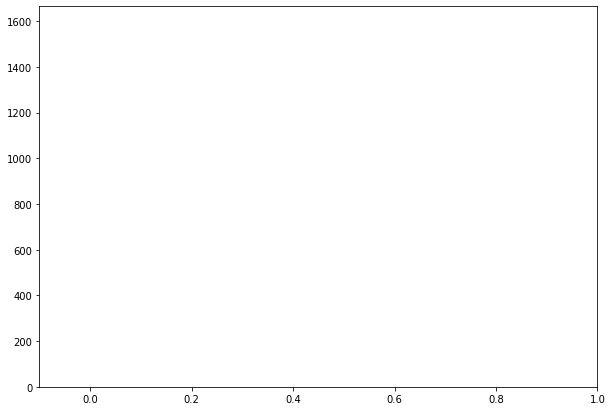

In [43]:
for i in range(1):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(10, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_skills) + (n_clust + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = ms
    cluster_labels = clusters2

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_projected, cluster_labels)
    print("Para n_clusters =", n_clusters_,
          "El silhouette_score promedio es :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_projected, cluster_labels)

    y_lower = 10
    for i in range(n_clust):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clust)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Visualizacion de los datos.")
    ax1.set_xlabel("Valor del coeficiente silhouette")
    ax1.set_ylabel("Cluster Id")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

## Descomposición de componentes principales + K-Means sin arqueros

In [ ]:
df_n=df[(df["team_position"]!='GK')&(df["team_position"]!='SUB')&(df["team_position"]!='RES')&(df['overall'] > 75)] # mejores jugadores

print(f'{len(df_n)} mejores jugadores con overall mayor a 75')


skills_ratings = ['attacking_crossing', 'attacking_finishing',
                  'attacking_heading_accuracy', 'attacking_short_passing',
                  'attacking_volleys', 'skill_dribbling', 'skill_curve',
                  'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
                  'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
                  'movement_reactions', 'movement_balance', 'power_shot_power',
                  'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
                  'mentality_aggression', 'mentality_interceptions',
                  'mentality_positioning', 'mentality_vision', 'mentality_penalties',
                  'mentality_composure', 'defending_marking', 'defending_standing_tackle',
                  'defending_sliding_tackle', 'goalkeeping_diving']

print(f'{len(skills_ratings)} variables numéricas de desempeño según habilidad')

df_skills=df_n[skills_ratings]


### 5.1 Centramos en 0 y normalizamos

In [ ]:
from sklearn import preprocessing
std_scale=preprocessing.StandardScaler().fit(df_skills)
X_scaled=std_scale.transform(df_skills) # numpyarray normalizado por columna

### 5.2 Descomposición en componentes principales

In [ ]:
from sklearn import decomposition
pca=decomposition.PCA(n_components=2) #elegimos 2, 3 o 4 pero pueden ser más, 

pca.fit(X_scaled) #input data is centered but not scaled for each feature before applying the SVD

# proporción de varianza
print('proporción de varianza por componente: ', pca.explained_variance_ratio_)
# proporción de varianza acumulada
print ('proporción de varianza por componente acumulada: ', pca.explained_variance_ratio_.cumsum())

X_projected=pca.transform(X_scaled) #numpy array
print ('tamaño de los datos: ', X_projected.shape)


In [ ]:
pcs=pca.components_  #"composición" de las primeras componentes, 
#Graph 1
data=[]

for i, (x,y) in enumerate(zip(pcs[0,:],pcs[1,:])):
    graph=go.Scatter(x=[0,x],y=[0,y],text=df_skills.columns[i],
                     mode='lines+markers+text',textposition='top left',textfont=dict(family='sans serif',size=15))
    data.append(graph)

layout = go.Layout(title="ACP - Fifa Skills",titlefont=dict(size=20),
            xaxis=dict(title='Componente 1'),
            yaxis=dict(title='Componente 2'),
            autosize=False, width=1050,height=750,
            showlegend=False)

fig = go.Figure(data=data, layout=layout)

iplot(fig)


In [ ]:
#Graph 2
#Choose your player

bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86
palette=['navy','red','#A2D5F2','orange','green','pink']  
data=[]

acp_crack =go.Scatter(x=X_projected[bool_crack,0], y=X_projected[bool_crack,1],name='Crack',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=15,color='black'),
                      opacity=0.9,marker=dict(color=palette[2],size=7),mode='markers+text')

acp_no_crack =go.Scatter(x=X_projected[bool_no_crack,0], y=X_projected[bool_no_crack,1],name='Average player',
                         text=df_n.loc[bool_no_crack,'short_name'],
                         opacity=0.6,marker=dict(color=palette[1],size=3),mode='markers')

data=[acp_no_crack,acp_crack]

layout = go.Layout(title="ACP - Fifa Players",titlefont=dict(size=20),
                xaxis=dict(title='Componente 1'),
                yaxis=dict(title='componente 2'),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

iplot(fig)


### 5.3 K means con descomposición de componentes principales

In [ ]:
# Número de clusters buscado
n_clust = 4

km = KMeans(n_clusters=n_clust)
km.fit(X_projected)

# Recuperacion de etiquetas
clusters = km.labels_
print('Suma de los cuadrados de las distancias al cluster / Inertia: ', km.inertia_)

In [ ]:
data=[]
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86

#Eligo dos números entre 0 y  de n_skills-1
skill_1=X_projected
skill_2=X_projected


kmean_clusters = go.Scatter(x=X_projected[:,0], y=X_projected[:,1],
                           mode='markers',
                           text=df_n.loc[:,'short_name'],
                           #text=df_n.loc[:,'team_position'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=X_projected[bool_crack,0], y=X_projected[bool_crack,1],name='Ckacks!!',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title='Componente 1'),
                yaxis=dict(title='componente 2'),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

In [ ]:
for i in range(1):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(10, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_skills) + (n_clust + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = km
    cluster_labels = clusters

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_projected, cluster_labels)
    print("Para n_clusters =", n_clust,
          "El silhouette_score promedio es :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_projected, cluster_labels)

    y_lower = 10
    for i in range(n_clust):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clust)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Visualizacion de los datos.")
    ax1.set_xlabel("Valor del coeficiente silhouette")
    ax1.set_ylabel("Cluster Id")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 6- Evaluación.

Como métricas de análisis de los resultados de los ḿétodos utilizados ( K-Means, Meanshift y Cluster Jerárquico) utilizamos el gráfico y coeficiente de silhouette. Además, calculamos las tablas de contingencias respecto a las posiciones de los jugadores y graficamos los clusters respecto a los skills seleccionados.  
De estos datos podemos concluir que el método meanshift fue el que peor desempeño tuvo. Esto podría ser debido a que según los skills seleccionados los puntos no quedan claramente separados.  
Respecto a los dos métodos restantes, se obtuvieron mejores resultados con la técnica de K-means respecto a clustering jerárquico.  
Utilizando embeddings, particularmente descomposición en componentes principales, se observó una mejoría notable en las métricas de evaluación de pérformance de los métodos.  
También se realizaron pruebas eliminando el grupo de arqueros del dataset original. Se observaron resultados similares en los métodos de K-Means, Clustering Jerárquico y Meanshifts y resultados superiores aplicando la técnica de embeddings "descomposición de componentes principales".

# 7- Pregunta: ¿Se realizó alguna normalización de la base? ¿Por qué ?

Normalizamos en la etapa de preparación de los datos, para evitar que unas variables dominen sobre otras los valores.